In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/boydo7/Stroke-Prediction-/main/healthcare-dataset-stroke-data.csv')


# Data Exploration

|	Feature Name	|	Description	|
|	:---	|	:---	|
|	id	|	 Unique identifier	|
|	gender	|	 Gender of the patient (Male, Female, Other)	|
|	age	|	 Age of the patient	|
|	hypertension	|	 0 if the patient doesn't have hypertension, 1 if the patient has hypertension	|
|	heart_disease	|	 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease	|
|	ever_married	|	 Yes if the patient is married, No if the patient is not married	|
|	work_type	|	 Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)	|
|	Residence_type	|	 Residence category of the patient (Rural, Urban)	|
|	avg_glucose_level	|	 Average glucose level in blood of the patient	|
|	bmi	|	 Body Mass Index of the patient	|
|	smoking_status	|	 Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). Unknown in smoking_status means that the information is unavailable for this patient	|
|	stroke	|	 1 if the patient had a stroke or 0 if not	|


In [5]:
print('Shape of dataset :',train.shape)
train.head() #overview of the dataset

Shape of dataset : (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
train=train.drop(labels=3116,axis=0)
train[train['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
train.hypertension=train.hypertension.map({1:'yes',0:'no'})
train.heart_disease=train.heart_disease.map({1:'yes',0:'no'})
train.stroke=train.stroke.map({1:'yes',0:'no'})

In [10]:
train=train.drop(['id'],axis=1)

In [11]:
train.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension",
        "heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type",
        "Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI",
        "smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)

In [12]:
#df.to_csv(r'C:\Users\Boydo\Downloads\dataset_stroke.csv')

# Visualization

Text(0.5, 1.0, '\nStroke Patients Age Distribution\n')

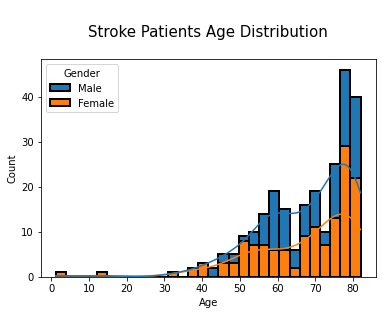

In [13]:
sns.histplot(data=train[train["Stroke"] == "yes"],x="Age",hue="Gender",multiple="stack",kde=True,bins=30,alpha=1,linewidth=2)
plt.title('\nStroke Patients Age Distribution\n',fontsize=15)

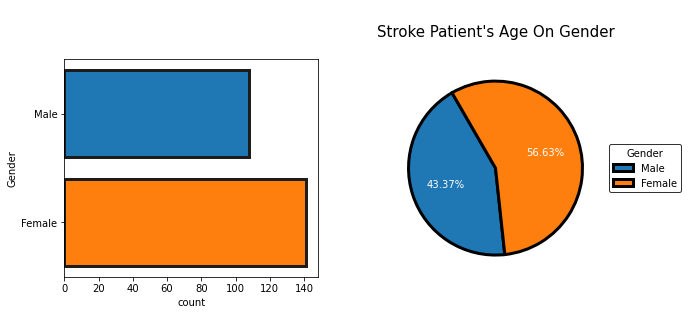

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Gender"],order=train[train["Stroke"]=="yes"]["Gender"].value_counts(ascending=True).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.title("\nStroke Patient's Age On Gender\n",fontsize=15)

labels = "Male","Female"

plt.pie([train[train["Stroke"] == "yes"]["Gender"].value_counts(ascending=True).values[0],
        train[train["Stroke"] == "yes"]["Gender"].value_counts(ascending=True).values[1]], explode = (0,0),
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%",startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))

plt.legend( labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")



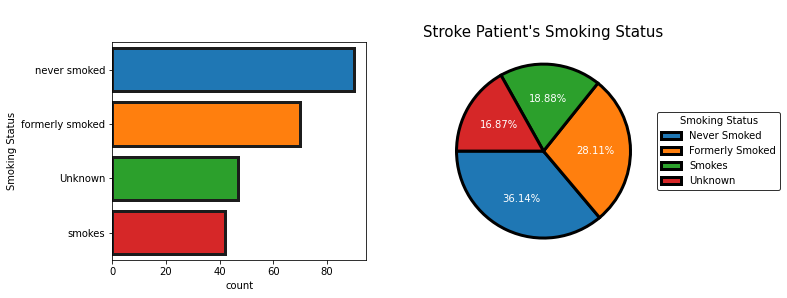

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))


sns.countplot(y=train[train["Stroke"]=="yes"]["Smoking Status"],order=train[train["Stroke"]=="yes"]["Smoking Status"].value_counts(ascending=False).index, 
            saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])
plt.title("\nStroke Patient's Smoking Status",fontsize=15)

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"

plt.pie([train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[1],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[2],
        train[train["Stroke"] == "yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%",startangle = 180,wedgeprops=dict( edgecolor = "black", linewidth = 3))

plt.legend(labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

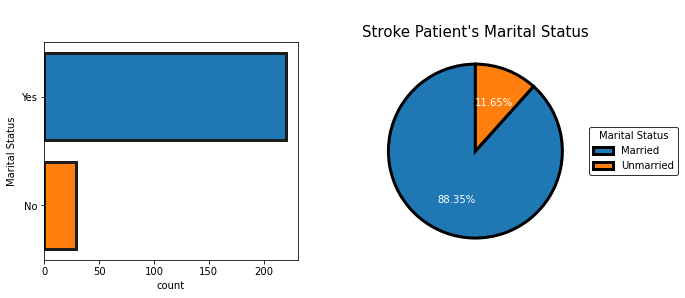

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Marital Status"],order=train[train["Stroke"]=="yes"]["Marital Status"].value_counts(ascending=False).index, 
            saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.title("\nStroke Patient's Marital Status",fontsize=15)

labels = "Married","Unmarried"

plt.pie([train[train["Stroke"] == "yes"]["Marital Status"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Marital Status"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%", wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 90)

plt.legend( labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")


Text(0.5, 1.0, '\nStroke Patients BMI Distribution\n')

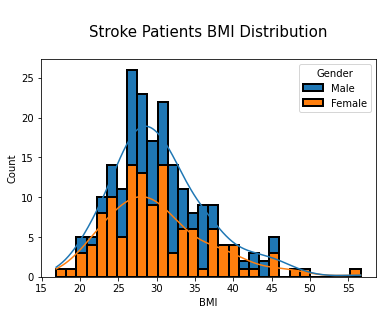

In [17]:
sns.histplot(data=train[train["Stroke"] == "yes"],x="BMI",hue="Gender",multiple="stack",
kde=True,bins=30,alpha=1,fill=True,linewidth=2)
plt.title('\nStroke Patients BMI Distribution\n',fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Heart Disease")

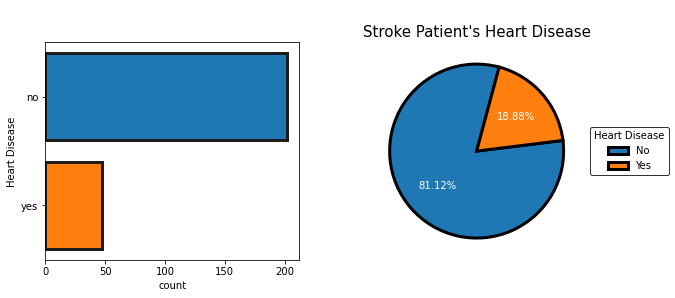

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Heart Disease"],order=train[train["Stroke"]=="yes"]["Heart Disease"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "No","Yes"

plt.pie([train[train["Stroke"] == "yes"]["Heart Disease"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%", wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 75)

plt.legend(labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Hypertension Status")

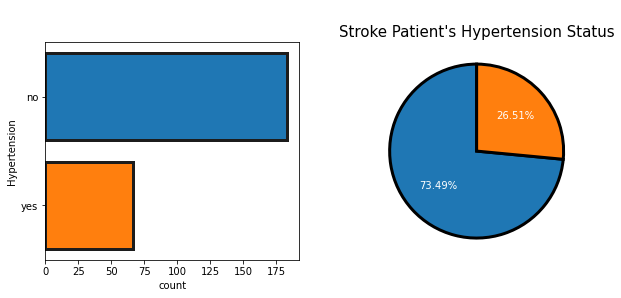

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Hypertension"],order=train[train["Stroke"]=="yes"]["Hypertension"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

plt.pie([train[train["Stroke"] == "yes"]["Hypertension"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Hypertension"].value_counts(ascending=False).values[1]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%", 
        wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = 90)
plt.title("\nStroke Patient's Hypertension Status",fontsize=15)
        

Text(0.5, 1.0, '\nStroke Patients Average Glucose Level Distribution\n')

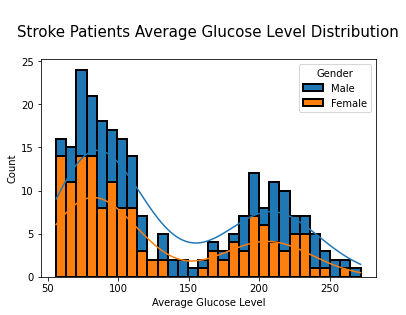

In [20]:
sns.histplot(data=train[train["Stroke"]=="yes"],x="Average Glucose Level",hue="Gender",
            multiple="stack",kde=True,bins=30,alpha=1,fill=True,linewidth=2)
plt.title('\nStroke Patients Average Glucose Level Distribution\n',fontsize=15)

Text(0.5, 1.0, "\nStroke Patient's Occupation Type")

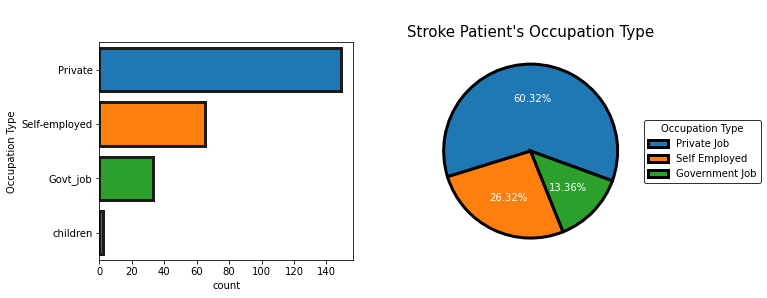

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Occupation Type"],order=train[train["Stroke"]=="yes"]["Occupation Type"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "Private Job","Self Employed","Government Job"

plt.pie([train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[0],
        train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[1],
        train[train["Stroke"] == "yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
        textprops=dict(size= 10, color= "white"),autopct="%.2f%%", 
        wedgeprops=dict( edgecolor = "black", linewidth = 3),startangle = -20)

plt.legend( labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=15)

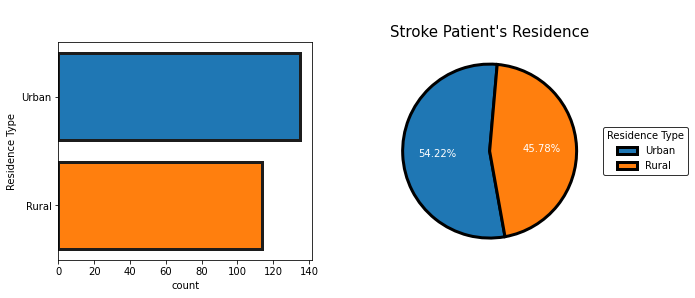

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(y=train[train["Stroke"]=="yes"]["Residence Type"],order=train[train["Stroke"]=="yes"]["Residence Type"].value_counts(ascending=False).index, 
saturation=1, edgecolor = "#1c1c1c", linewidth = 3,ax=ax[0])

labels = "Urban","Rural"

plt.pie([train[train["Stroke"] == "yes"]["Residence Type"].value_counts(ascending=False).values[0],
                                    train[train["Stroke"] == "yes"]["Residence Type"].value_counts(ascending=False).values[1]],
                                   
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%", 
                                    
                                    wedgeprops=dict( edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.title("\nStroke Patient's Residence",fontsize=15)

plt.legend(labels, title="Residence Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

# Data Preparation

In [23]:
df=train

In [24]:
print('Number of duplicates data : ',df.duplicated().sum()) # checking duplicated data

Number of duplicates data :  0


In [25]:
missing_data = df.isnull().sum(axis=0).reset_index()  #checking missing value
missing_data.columns=['variable','missing values']
missing_data['filling factor %']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor %').reset_index(drop = True)

,variable,missing values,filling factor %
0,BMI,201,96.065766
1,Gender,0,100.000000
2,Age,0,100.000000
3,Hypertension,0,100.000000
4,Heart Disease,0,100.000000
5,Marital Status,0,100.000000
6,Occupation Type,0,100.000000
7,Residence Type,0,100.000000
8,Average Glucose Level,0,100.000000
9,Smoking Status,0,100.000000


In [26]:
df=df.dropna()

print('Number of null values : ', df.isnull().sum())

Number of null values :  Gender                   0
Age                      0
Hypertension             0
Heart Disease            0
Marital Status           0
Occupation Type          0
Residence Type           0
Average Glucose Level    0
BMI                      0
Smoking Status           0
Stroke                   0
dtype: int64


# Correlation

In [27]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Occupation Type', 'Residence Type', 'Average Glucose Level', 'BMI',
       'Smoking Status', 'Stroke'],
      dtype='object')

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder



catcol = [col for col in df.columns if df[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age,Hypertension,Heart Disease,Marital Status,Occupation Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [29]:
df2=df.corr().Stroke.reset_index().sort_values(by='Stroke',ascending=False)
df2

,index,Stroke
10,Stroke,1.000000
1,Age,0.232313
2,Hypertension,0.142503
7,Average Glucose Level,0.138984
3,Heart Disease,0.137929
4,Marital Status,0.105051
9,Smoking Status,0.051544
8,BMI,0.042341
0,Gender,0.006904
6,Residence Type,0.005988


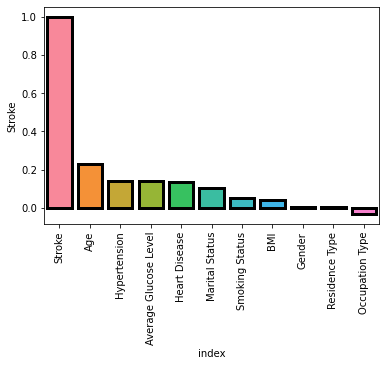

In [30]:
chart = sns.barplot(data=df2,x="index",y="Stroke",saturation=1, edgecolor = "#000000", linewidth = 3)

for item in chart.get_xticklabels():
  item.set_rotation(90)

<AxesSubplot:>

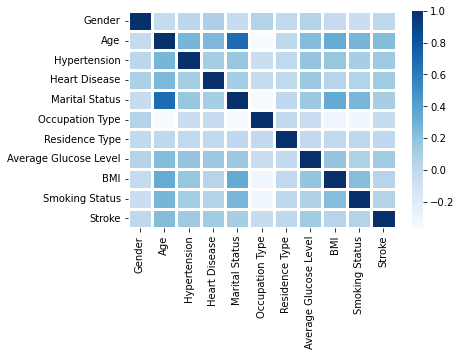

In [31]:
sns.heatmap(df.corr(),cmap="Blues", edgecolor = "#1c1c1c", linewidth = 3)

# Machine Learning

In [32]:
X=df.drop(['Stroke'],1)
y=df[['Stroke']]

In [33]:
sc = StandardScaler()
X = sc.fit_transform(X)

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
lr = LogisticRegression()
lr.fit(train_X, train_y)


LogisticRegression()

In [35]:
lr_pred = lr.predict(test_X)
lr_conf = confusion_matrix(test_y, lr_pred)
lr_report = classification_report(test_y, lr_pred)
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2)
lr_rocauc=roc_auc_score(test_y, lr_pred)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Regresion: {lr_rocauc}')



Confusion Matrix : 

[[939   0]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982


The Accuracy of Logistic Regresion is 95.62 %
ROC AUC score wiht Logistic Regresion: 0.5


In [36]:
dtr=DecisionTreeClassifier()

dtr.fit(train_X,train_y)


DecisionTreeClassifier()

In [37]:
dtr_pred=dtr.predict(test_X)
dtr_conf=confusion_matrix(test_y,dtr_pred)
dtr_report=classification_report(test_y,dtr_pred)
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3)
dtr_rocauc=roc_auc_score(test_y, dtr_pred)
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[902  37]
 [ 40   3]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       939
           1       0.07      0.07      0.07        43

    accuracy                           0.92       982
   macro avg       0.52      0.52      0.52       982
weighted avg       0.92      0.92      0.92       982


The Accuracy of Decision Tree is 92.159 %
ROC AUC Score with Decision Tree: 0.5151819104935978


In [38]:
rfc = RandomForestClassifier() 
rfc.fit(train_X,train_y)


RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(test_X)
rfc_conf = confusion_matrix(test_y, rfc_pred)
rfc_report = classification_report(test_y, rfc_pred)
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2)
rfc_rocauc=roc_auc_score(test_y, rfc_pred)
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest Classifier: {rfc_rocauc}')

Confusion Matrix : 

[[937   2]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982


The Accuracy of Random Forest Classifier is 95.42 %
ROC AUC score wiht Random Forest Classifier: 0.4989350372736954


In [40]:
gradien=GradientBoostingClassifier()

gradien.fit(train_X,train_y)

GradientBoostingClassifier()

In [41]:
gradien_pred=gradien.predict(test_X)
gradien_conf=confusion_matrix(test_y,gradien_pred)
gradien_report=classification_report(test_y,gradien_pred)
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3)
gradien_rocauc=roc_auc_score(test_y, gradien_pred)
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[938   1]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982


The Accuracy of Gradien Boost is 95.519 %
ROC AUC score wiht Gradien Boost: 0.4994675186368477


In [42]:
sgd=SGDClassifier()

sgd.fit(train_X,train_y)

SGDClassifier()

In [43]:
sgd_pred=sgd.predict(test_X)
sgd_conf=confusion_matrix(test_y,sgd_pred)
sgd_report=classification_report(test_y,sgd_pred)
sgd_acc=round(accuracy_score(test_y,sgd_pred)*100,ndigits=3)
sgd_rocauc=roc_auc_score(test_y, sgd_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")
print(f"\nClassification Report : \n\n{sgd_report}")
print(f"\nThe Accuracy of SGD is {sgd_acc} %")
print(f'ROC AUC Score with SGD: {sgd_rocauc}')

Confusion Matrix : 

[[939   0]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982


The Accuracy of SGD is 95.621 %
ROC AUC Score with SGD: 0.5


In [44]:
gnb=GaussianNB()

gnb.fit(train_X,train_y)


GaussianNB()

In [45]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[827 112]
 [ 22  21]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       939
           1       0.16      0.49      0.24        43

    accuracy                           0.86       982
   macro avg       0.57      0.68      0.58       982
weighted avg       0.94      0.86      0.89       982


The Accuracy of Gaussian is 86.354 %
ROC AUC Score with Gaussian Naive Bayes: 0.6845481338385714


In [46]:
xgboost=XGBClassifier(objective='binary:logistic',eval_metric = 'auc', n_jobs=-1)
xgboost.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
xgboost_pred=xgboost.predict(test_X)
xgboost_conf=confusion_matrix(test_y,xgboost_pred)
xgboost_report=classification_report(test_y,xgboost_pred)
xgboost_acc=round(accuracy_score(test_y,xgboost_pred)*100,ndigits=3)
xgboost_rocauc=roc_auc_score(test_y, xgboost_pred)
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[933   6]
 [ 40   3]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       939
           1       0.33      0.07      0.12        43

    accuracy                           0.95       982
   macro avg       0.65      0.53      0.55       982
weighted avg       0.93      0.95      0.94       982


The Accuracy of XGB is 95.316 %
ROC AUC Score with XGBOOST: 0.5316888327513188


In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [50]:
knn_pred=knn.predict(test_X)
knn_conf=confusion_matrix(test_y,knn_pred)
knn_report=classification_report(test_y,knn_pred)
knn_acc=round(accuracy_score(test_y,knn_pred)*100,ndigits=3)
knn_rocauc=roc_auc_score(test_y, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of KNN is {knn_acc} %")
print(f'ROC AUC Score with KNN: {knn_rocauc}')


Confusion Matrix : 

[[935   4]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982


The Accuracy of KNN is 95.214 %
ROC AUC Score with KNN: 0.49787007454739085


In [51]:
from sklearn import svm

SVM=svm.SVC()

SVM.fit(train_X,train_y)

SVC()

In [52]:
SVM_pred=SVM.predict(test_X)
SVM_conf=confusion_matrix(test_y,SVM_pred)
SVM_report=classification_report(test_y,SVM_pred)
SVM_acc=round(accuracy_score(test_y,SVM_pred)*100,ndigits=3)
SVM_rocauc=roc_auc_score(test_y, SVM_pred)
print(f"Confusion Matrix : \n\n{SVM_conf}")
print(f"\nClassification Report : \n\n{SVM_report}")
print(f"\nThe Accuracy of SVM is {SVM_acc} %")
print(f'ROC AUC Score with SVM: {SVM_rocauc}')


Confusion Matrix : 

[[939   0]
 [ 43   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982


The Accuracy of SVM is 95.621 %
ROC AUC Score with SVM: 0.5


In [53]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc],
                        ["KNeighborsClassifier",knn_acc,knn_rocauc],
                        ["Support Vector Machine",SVM_acc,SVM_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
7,Support Vector Machine,95.621000,0.500000
5,Logistic Regression,95.620000,0.500000
3,Gradien Boost Classifier,95.519000,0.499468
4,Random Forest Classifier,95.420000,0.498935
0,XGBoost Classifier,95.316000,0.531689
6,KNeighborsClassifier,95.214000,0.497870
1,Decision Tree Classifier,92.159000,0.515182
2,Gaussian naive bayes classifier,86.354000,0.684548
